In [140]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [141]:
# lets create a synthetic data points 
from sklearn.datasets import make_classification

In [142]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2,
                          n_redundant=0,random_state=11)

In [143]:
X

array([[-1.25959191, -2.77879639],
       [-0.44855661, -2.36619676],
       [-0.05400102, -0.68070535],
       ...,
       [ 0.08339135, -1.56325126],
       [-1.91790668, -0.71043706],
       [-1.30373837, -1.05242172]], shape=(1000, 2))

In [144]:
y

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,

<Axes: xlabel='0', ylabel='1'>

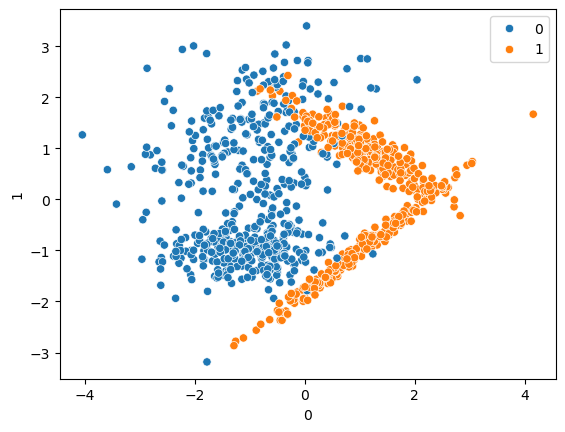

In [145]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1], hue=y)

In [146]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.25, random_state=42)

In [147]:
from sklearn.svm import SVC 
svc = SVC(kernel= 'rbf')
svc.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [148]:
# predictions 
y_pred = svc.predict(X_test)

In [149]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
score = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test,y_pred)

print("Accuracy", score)
print('Confision_metrix', matrix)
print('Classification_report', report)

Accuracy 0.96
Confision_metrix [[121   7]
 [  3 119]]
Classification_report               precision    recall  f1-score   support

           0       0.98      0.95      0.96       128
           1       0.94      0.98      0.96       122

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



# Now lets do some Hyperparameter tuning

In [150]:
from sklearn.model_selection import GridSearchCV 
param_grid = { 
    'C': [0.1,1,10,100,1000], 
    'gamma': [1,0.1,0.001,0.0001],
    'kernel':['rbf']
}

In [151]:
grid = GridSearchCV(SVC(), param_grid=param_grid,refit=True,cv=5,verbose=3)

In [152]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.867 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1000


In [153]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [154]:
y_Pred = grid.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
score = accuracy_score(y_test, y_Pred)
matrix = confusion_matrix(y_test, y_Pred)
report = classification_report(y_test,y_Pred)

print("Accuracy", score)
print('Confision_metrix', matrix)
print('Classification_report', report)

Accuracy 0.964
Confision_metrix [[122   6]
 [  3 119]]
Classification_report               precision    recall  f1-score   support

           0       0.98      0.95      0.96       128
           1       0.95      0.98      0.96       122

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

